In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
sns.set()
font_titlesize = 18
font_axeslabelsize = 14
font_legendsize = 10

In [2]:
# Loading data
df = pd.read_csv('movieReplicationSet.csv')
movie_col_count = 400
df.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


# Q1. 

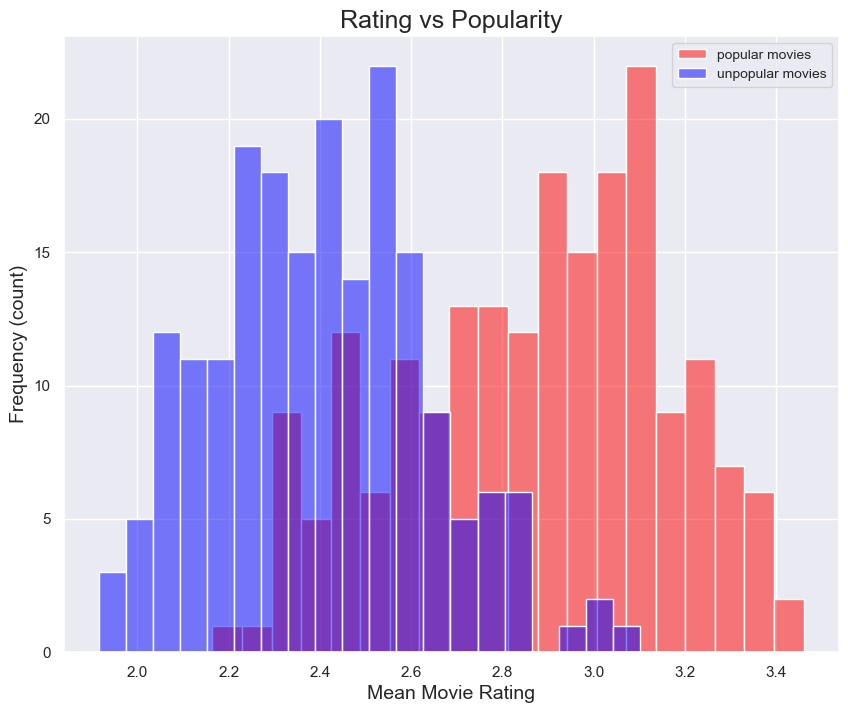

In [3]:
movies_popularity = df.count().iloc[0:movie_col_count]
movies_mean_rating = df.mean(skipna = True).iloc[0:movie_col_count]
top_idx = np.where(movies_popularity > np.median(movies_popularity))[0]
movies_rating_popular = movies_mean_rating[top_idx]
movies_rating_unpopular = np.setdiff1d(movies_mean_rating, movies_rating_popular)
plt.figure(figsize = (10, 8))
bin_count = 20
plt.hist(movies_rating_popular, bin_count, color=[1, 0, 0, 0.5], label='popular movies')
plt.hist(movies_rating_unpopular, bin_count, color=[0, 0, 1, 0.5], label='unpopular movies')
plt.title('Rating vs Popularity', fontsize=font_titlesize)
plt.xlabel('Mean Movie Rating', fontsize=font_axeslabelsize)
plt.ylabel('Frequency (count)', fontsize=font_axeslabelsize)
plt.legend(fontsize=font_legendsize)
plt.show()

In [119]:
weights = linregress(movies_popularity, movies_mean_rating)
print(weights)
plt.figure(figsize = (7, 7))
plt.plot(movies_popularity, movies_mean_rating, 'ro', markersize = 2)
plt.plot(movies_popularity, movies_popularity*weights.slope+weights.intercept, 'k--')
plt.title(f'Correlation coefficient = {round(weights.rvalue, 4)}, p-value < 0.05)', fontsize = font_titlesize)
plt.xlabel('Movie Popularity', fontsize = font_axeslabelsize)
plt.ylabel('Movies Median Rating', fontsize = font_axeslabelsize)
plt.show()

# Q2. 

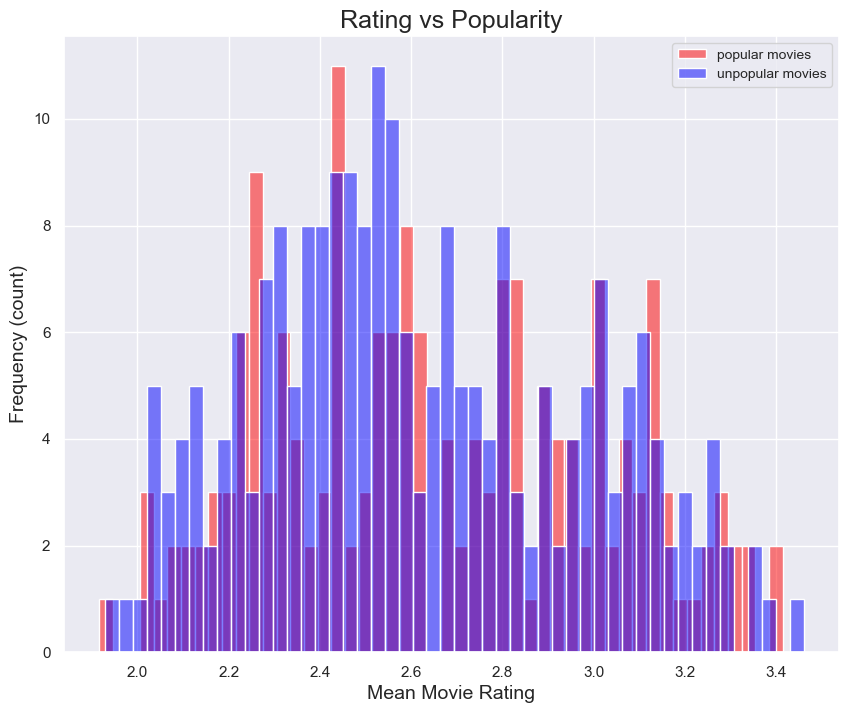

In [109]:
movies_year = np.zeros((movie_col_count, ), dtype='int')
for ii in range(movie_col_count):
    mv_name = df.columns[ii]
    movies_year[ii] = int(mv_name[-5:-1])
top_idx = np.where(movies_year > np.median(movies_year))[0]
movies_rating_popular = movies_mean_rating[top_idx]
movies_rating_unpopular = np.setdiff1d(movies_mean_rating, movies_rating_popular)
plt.figure(figsize = (10, 8))
bin_count = 50
plt.hist(movies_rating_popular, bin_count, color=[1, 0, 0, 0.5], label='popular movies')
plt.hist(movies_rating_unpopular, bin_count, color=[0, 0, 1, 0.5], label='unpopular movies')
plt.title('Rating vs Popularity', fontsize=font_titlesize)
plt.xlabel('Mean Movie Rating', fontsize=font_axeslabelsize)
plt.ylabel('Frequency (count)', fontsize=font_axeslabelsize)
plt.legend(fontsize=font_legendsize)
plt.show()

# Q3. 

(807,)
(260,)


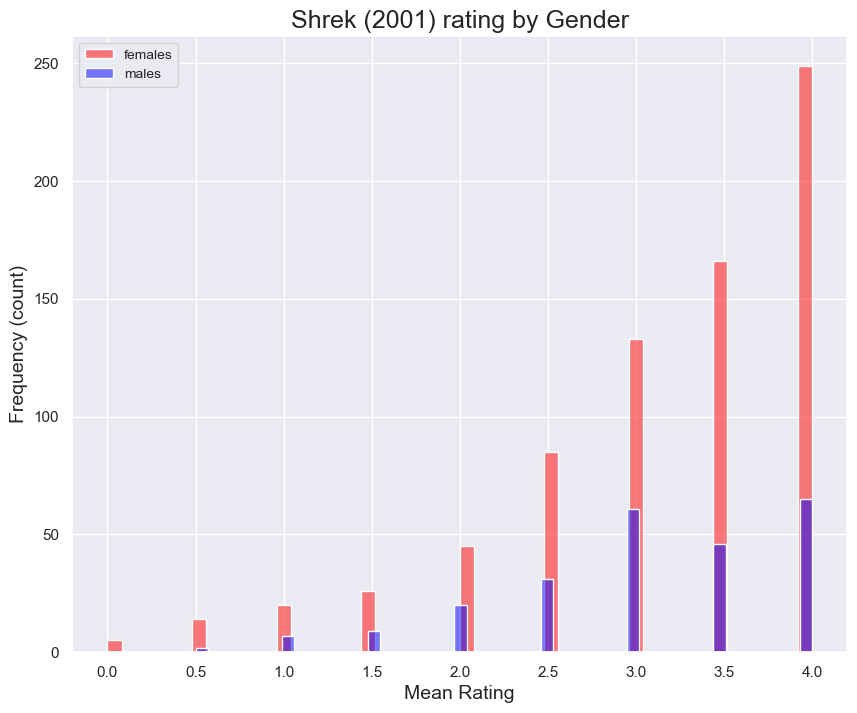

In [118]:
shrek_rating_female = df[df['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1]['Shrek (2001)']
shrek_rating_male = df[df['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2]['Shrek (2001)']
print(shrek_rating_female.shape)
print(shrek_rating_male.shape)

plt.figure(figsize = (10, 8))
bin_count = 50
plt.hist(shrek_rating_female, bin_count, color=[1, 0, 0, 0.5], label='females')
plt.hist(shrek_rating_male, bin_count, color=[0, 0, 1, 0.5], label='males')
plt.title('Shrek (2001) rating by Gender', fontsize=font_titlesize)
plt.xlabel('Mean Rating', fontsize=font_axeslabelsize)
plt.ylabel('Frequency (count)', fontsize=font_axeslabelsize)
plt.legend(fontsize=font_legendsize)
plt.show()

# Q4. 

# Q5. 

# Q6. 

# Q7. 

# Q8. 

# Q9

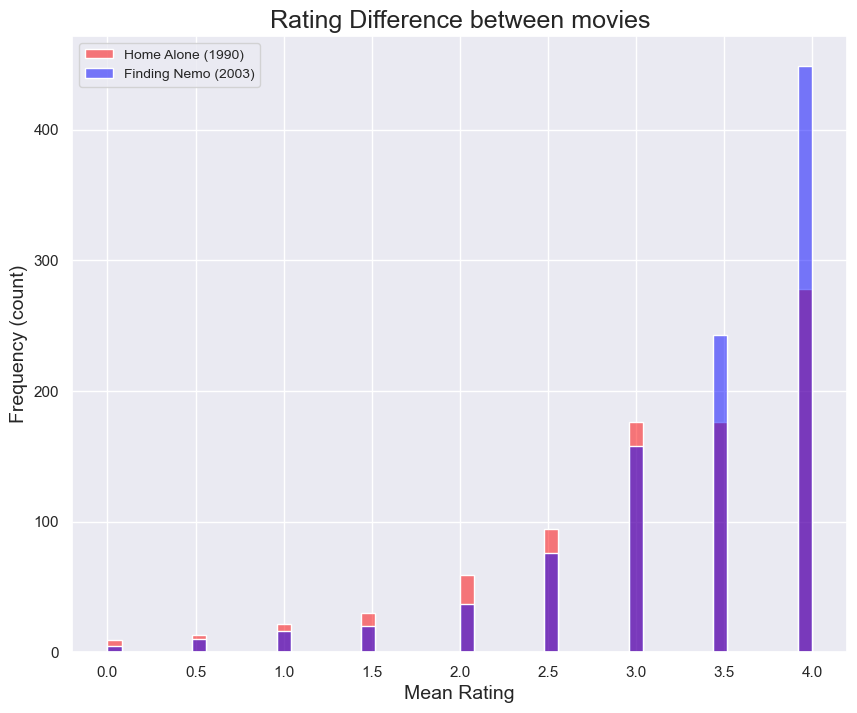

In [7]:
ratings_home_alone = df['Home Alone (1990)'].dropna().to_numpy()
ratings_finding_nemo = df['Finding Nemo (2003)'].dropna().to_numpy()
plt.figure(figsize = (10, 8))
bin_count = 50
plt.hist(ratings_home_alone, bin_count, color=[1, 0, 0, 0.5], label='Home Alone (1990)')
plt.hist(ratings_finding_nemo, bin_count, color=[0, 0, 1, 0.5], label='Finding Nemo (2003)')
plt.title('Rating Difference between movies', fontsize=font_titlesize)
plt.xlabel('Mean Rating', fontsize=font_axeslabelsize)
plt.ylabel('Frequency (count)', fontsize=font_axeslabelsize)
plt.legend(fontsize=font_legendsize)
plt.show()

# Q10